In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import datetime

In [3]:
raw_df = pd.read_csv("../../../../../Downloads/Datasets/Food_Establishment_Inspection_Data.csv")

/tmp/ipykernel_28337/2975437111.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv("../../../../../Downloads/Datasets/Food_Establishment_Inspection_Data.csv")


In [4]:
# Data Wrangling
cols = { k:k.replace(' ','_').lower() for k in raw_df.keys()}
raw_df = raw_df.rename(columns=cols)
raw_df.city=raw_df.city.str.upper()
raw_df.drop(['program_identifier','inspection_business_name','inspection_serial_num','violation_record_id','business_id'], axis=1);
raw_df["inspection_date"]=pd.to_datetime(raw_df["inspection_date"])
raw_df['weekday'] = raw_df.inspection_date.dt.day_name()

raw_df.loc[raw_df['longitude'] > 122, 'longitude'] *=-1
not_valid_inspection_result_rows=raw_df[(raw_df.inspection_result !='Unsatisfactory') & (raw_df.inspection_result !='Complete') &
(raw_df.inspection_result !='Incomplete') & (raw_df.inspection_result !='Satisfactory')]
raw_df.drop(not_valid_inspection_result_rows.index, inplace=True)

dropindex = raw_df[raw_df['inspection_score']<0 ].index
raw_df.drop(dropindex, inplace=True)

raw_df['name'] = raw_df.name.str.strip()
df = raw_df.reindex()

df['inspection_closed_business'].replace({False: 0, True: 1}, inplace=True)
#df.to_csv('basic_df.csv')

In [5]:
find_index_grade_null=df[df.grade.isnull()].index
find_index_grade_null
#df.drop(find_index_grade_null, inplace=True)

Index([    48,     49,     50,     51,    361,    362,    363,    421,    422,
          539,
       ...
       255388, 255389, 255390, 255391, 255392, 255393, 255394, 255395, 255396,
       255397],
      dtype='int64', length=61129)

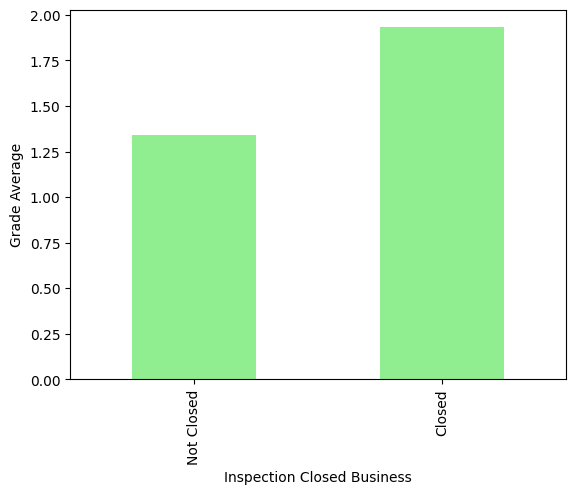

In [6]:
# Study about grade
grouped_df_grade=df.groupby(['name', 'inspection_date', 'inspection_closed_business', 'grade'])['violation_points'].sum().reset_index().rename(columns={'violation_points': 'inspection_score'})
grouped_df_grade_mean_score= grouped_df_grade.groupby('inspection_closed_business')['grade'].mean()
grouped_df_grade_mean_score.to_csv('grade_mean_score.csv')
# Plot Show
x_values=['Not Closed','Closed']
ax=grouped_df_grade_mean_score.plot(kind='bar', x='inspection_closed_business', y='grade', legend='', color='#90EE90')
ax.set_xticklabels(x_values)
plt.xlabel('Inspection Closed Business')
plt.ylabel('Grade Average')

Text(0, 0.5, 'Inspection Score Average')

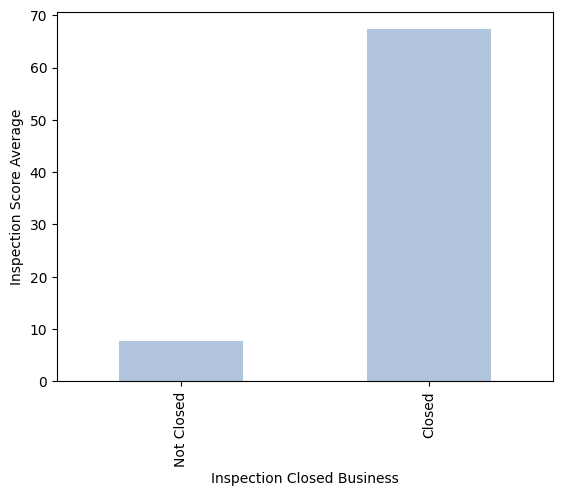

In [125]:
# Study about score
grouped_df_grade=df.groupby(['name', 'inspection_date', 'inspection_closed_business', 'grade'])['violation_points'].sum().reset_index().rename(columns={'violation_points': 'inspection_score'})
grouped_df_mean_score = grouped_df_grade.groupby('inspection_closed_business')['inspection_score'].mean().reset_index()
grouped_df_mean_score.to_csv('mean_score.csv')
# Plot Show
x_values=['Not Closed','Closed']
ax=grouped_df_mean_score.plot(kind='bar', x='inspection_closed_business', y='inspection_score', legend='', color='lightsteelblue')
ax.set_xticklabels(x_values)
plt.xlabel('Inspection Closed Business')
plt.ylabel('Inspection Score Average')

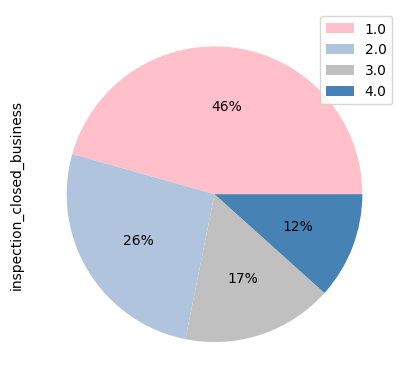

In [126]:
grouped_df_grade_close=grouped_df_grade.groupby('grade')['inspection_closed_business'].count()
grouped_df_grade_score = grouped_df_grade.loc[grouped_df_grade['inspection_closed_business']==1]
grouped_df_grade_closed = grouped_df_grade_score.groupby('grade')['inspection_closed_business'].count().reset_index()
grouped_df_grade_closed.to_csv('closed_score.csv')
# Plot Show
grouped_df_grade_closed_ = grouped_df_grade_closed.set_index('grade')
colors=['pink', 'lightsteelblue', 'silver', 'steelblue']
grouped_df_grade_closed_.plot(kind='pie', subplots=True, colors = colors, autopct='%1.0f%%', labeldistance=None)
plt.show()